In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier)
from sklearn import svm, tree
from sklearn.tree import DecisionTreeClassifier
import xgboost

In [2]:
df_train=pd.read_csv("train.csv")
df_train.head(5)

,Sno,Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,...,Job Code,Job,Employee Identifier,Overtime,Other Salaries,Retirement,Health/Dental,Other Benefits,Total Benefits,Class
0,9248,Fiscal,2017,3,Human Welfare & Neighborhood Development,DSS,HSA Human Services Agency,535,"SEIU - Human Services, Local 1021",2900,...,2905,Senior Eligibility Worker,41351,0.00,240.00,11896.36,13765.55,5248.43,30910.34,2
1,44541,Fiscal,2014,6,General Administration & Finance,ASR,ASR Assessor / Recorder,21,"Prof & Tech Engineers - Miscellaneous, Local 21",4200,...,4222,Sr Personal Property Auditor,41792,0.00,400.00,15429.94,9337.37,5599.01,30366.32,2
2,47031,Fiscal,2014,3,Human Welfare & Neighborhood Development,DSS,HSA Human Services Agency,535,"SEIU - Human Services, Local 1021",2900,...,2910,Social Worker,9357,0.00,1080.00,9682.00,8848.03,3463.92,21993.95,2
3,139416,Fiscal,2014,1,Public Protection,FIR,FIR Fire Department,798,"Firefighters - Miscellaneous, Local 798",H000,...,H002,Firefighter,28022,25730.46,18414.18,24222.26,13911.13,2416.58,40549.97,3
4,123780,Fiscal,2013,2,"Public Works, Transportation & Commerce",MTA,MTA Municipal Transprtn Agncy,790,"SEIU - Miscellaneous, Local 1021",1600,...,1224,Pr Payroll & Personnel Clerk,51052,1138.28,2148.11,15437.62,12828.15,7246.54,35512.31,3


In [3]:
def info1(master):
    listItem = []
    for col in master.columns :
        listItem.append([col,master[col].dtype,master[col].isna().sum(),
        round((master[col].isna().sum()/len(master[col])) * 100,2),
        master[col].nunique(),list(np.random.choice(np.array(master[col].unique()),5))])

    return pd.DataFrame(columns=['Features', 'dataType', 'null', 'null%', 'unique', 'Sample'],data=listItem) 

In [4]:
df_train.shape

(149087, 21)

In [5]:
df_train.info

<bound method DataFrame.info of            Sno Year Type  Year  Organization Group Code  \
0         9248    Fiscal  2017                        3   
1        44541    Fiscal  2014                        6   
2        47031    Fiscal  2014                        3   
3       139416    Fiscal  2014                        1   
4       123780    Fiscal  2013                        2   
5        50150    Fiscal  2016                        2   
6       185152    Fiscal  2016                        4   
7       201331    Fiscal  2014                        2   
8       161043    Fiscal  2017                        2   
9        85240    Fiscal  2014                        4   
10       52595    Fiscal  2014                        6   
11      153392    Fiscal  2016                        5   
12      156356    Fiscal  2015                        1   
13      195549    Fiscal  2015                        1   
14      112380    Fiscal  2016                        3   
15       54592    Fiscal

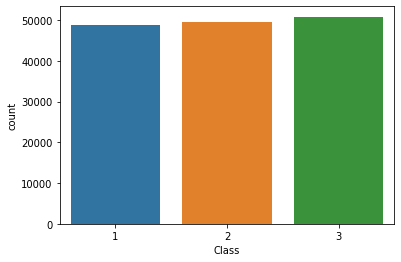

In [6]:
sns.countplot(x='Class',data=df_train)

In [7]:
y_train=df_train["Class"]

# Imputation:

In [8]:
df_train.drop(['Sno', 'Year Type','Union', 'Job Family', 'Job','Organization Group', 'Department'], axis = 1, inplace = True)
df_train.head(5)

,Year,Organization Group Code,Department Code,Union Code,Job Family Code,Job Code,Employee Identifier,Overtime,Other Salaries,Retirement,Health/Dental,Other Benefits,Total Benefits,Class
0,2017,3,DSS,535,2900,2905,41351,0.00,240.00,11896.36,13765.55,5248.43,30910.34,2
1,2014,6,ASR,21,4200,4222,41792,0.00,400.00,15429.94,9337.37,5599.01,30366.32,2
2,2014,3,DSS,535,2900,2910,9357,0.00,1080.00,9682.00,8848.03,3463.92,21993.95,2
3,2014,1,FIR,798,H000,H002,28022,25730.46,18414.18,24222.26,13911.13,2416.58,40549.97,3
4,2013,2,MTA,790,1600,1224,51052,1138.28,2148.11,15437.62,12828.15,7246.54,35512.31,3


In [9]:
col1=['Overtime','Other Salaries','Retirement','Health/Dental']

In [10]:
for col in col1:
    for i in range(1,4):
        df_train[col].replace(df_train[col][(df_train['Class']==i)&(df_train[col]<0)],
        df_train[col][(df_train[col]>0)& (df_train['Class']==i)].median(),inplace=True)

In [11]:
col2=['Other Benefits','Total Benefits']

In [12]:
for col in col2:
    for i in range(1,4):
        df_train[col].replace(df_train[col][(df_train['Class']==i)&(df_train[col]<=0)],
        df_train[col][(df_train[col]>0)& (df_train['Class']==i)].median(),inplace=True)

In [13]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,149087.0,2015.072018,1.410452,2013.00,2014.000,2015.00,2016.000,2017.00
Organization Group Code,149087.0,2.976980,1.582080,1.00,2.000,2.00,4.000,7.00
Union Code,149087.0,491.154963,333.914881,1.00,216.000,535.00,790.000,990.00
Employee Identifier,149087.0,28508.984465,16460.652590,1.00,14244.000,28520.00,42804.500,56987.00
Overtime,149087.0,4512.090462,11361.650170,0.00,0.000,0.00,2875.530,227313.62
Other Salaries,149087.0,3755.647114,7516.094161,0.00,0.000,700.00,4560.420,336726.34
Retirement,149087.0,12639.728661,9649.080034,0.00,3314.765,12841.28,19137.805,101306.01
Health/Dental,149087.0,9060.578642,5021.429479,0.00,4275.730,12137.41,12828.180,22052.15
Other Benefits,149087.0,4726.961428,3927.333413,0.01,1580.300,4398.12,6946.300,36815.39
Total Benefits,149087.0,26426.291979,16872.301759,0.01,9316.345,30311.60,38510.500,138503.52


In [14]:
from sklearn.decomposition import PCA

In [15]:
new_df_train = pd.get_dummies(data = df_train, columns = ['Organization Group Code', 'Department Code', 'Union Code', 'Job Family Code', 'Job Code'], drop_first = True)
X = new_df_train.drop('Class', axis = 1)

In [16]:
X.head(5)

,Year,Employee Identifier,Overtime,Other Salaries,Retirement,Health/Dental,Other Benefits,Total Benefits,Organization Group Code_2,Organization Group Code_3,...,Job Code_Q036,Job Code_Q037,Job Code_Q050,Job Code_Q051,Job Code_Q052,Job Code_Q060,Job Code_Q061,Job Code_Q062,Job Code_Q080,Job Code_Q082
0,2017,41351,0.00,240.00,11896.36,13765.55,5248.43,30910.34,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2014,41792,0.00,400.00,15429.94,9337.37,5599.01,30366.32,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2014,9357,0.00,1080.00,9682.00,8848.03,3463.92,21993.95,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2014,28022,25730.46,18414.18,24222.26,13911.13,2416.58,40549.97,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2013,51052,1138.28,2148.11,15437.62,12828.15,7246.54,35512.31,1,0,...,0,0,0,0,0,0,0,0,0,0


[4.83764262e-01 3.09682241e-01 1.37443181e-01 ... 3.30455057e-42
 2.07815948e-42 2.01880894e-43]


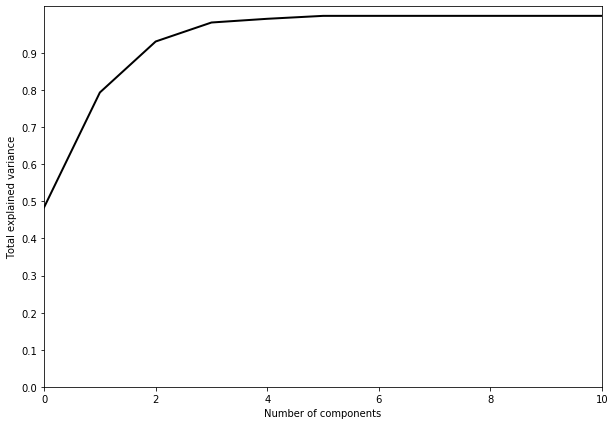

[0.48376426 0.7934465  0.93088968 0.98207797 0.99207577]


In [17]:
pca = PCA()
pca.fit(X)
X_pca = pca.transform(X)
pca.components_ 
pca.explained_variance_
pca.explained_variance_ratio_
print(pca.explained_variance_ratio_)
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 10, 1) 
plt.yticks(np.arange(0, 1, 0.1)) 
#plt.axvline(15.1, c='b') 
#plt.axhline(0.99, c='r') 
plt.show() 
pca = PCA(n_components = 5) 
pca.fit(X) 
X_train = pca.transform(X) 
print(np.cumsum(pca.explained_variance_ratio_))

# Kfold

In [25]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5)

In [23]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [20]:
# Modeling step Test differents algorithms
random_state = 100
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(LogisticRegression(random_state = random_state))

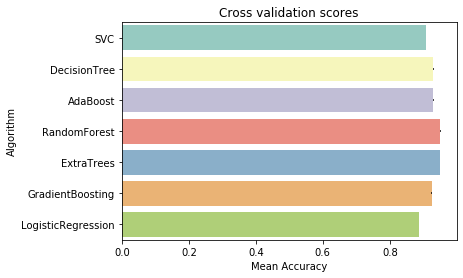

In [21]:
cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
    
#cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
#"RandomForest","ExtraTrees","GradientBoosting","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})
cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,
                       "Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","LogisticRegression"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

# AdaBoost  Classifier

In [27]:
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=100)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              #"algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsadaDTC.fit(X_train,y_train)

ada_best = gsadaDTC.best_estimator_

# Best score
gsadaDTC.best_score_

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   24.8s
[Parallel(n_jobs=4)]: Done 160 out of 160 | elapsed:  1.1min finished


0.9317244262822768

# ExtraTree Classifier

In [31]:
ExtC = ExtraTreesClassifier()

## Search grid for optimal parameters
ex_param_grid = {"max_depth": [5,7],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [2,3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini","entropy"]}


gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsExtC.fit(X_train,y_train)

ExtC_best = gsExtC.best_estimator_

# Best score
gsExtC.best_score_

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  8.3min
[Parallel(n_jobs=4)]: Done 360 out of 360 | elapsed: 15.5min finished


0.8880318270198181

# Random Forest Classifier

In [32]:

RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [5,7],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 14.2min
[Parallel(n_jobs=4)]: Done 180 out of 180 | elapsed: 59.5min finished


0.9214418665510292

# GradientBoosting Classifier

In [29]:
GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1]
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(X_train,y_train)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 21.4min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed: 125.2min
[Parallel(n_jobs=4)]: Done 360 out of 360 | elapsed: 252.2min finished


0.9453406491022338

# SVC Classifier

In [79]:
df_test=pd.read_csv('test.csv')

In [36]:
submission=pd.DataFrame()

In [37]:
submission['Sno'] = df_test['Sno']

In [38]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Sno,63895.0,106571.623398,61543.894551,3.00,53501.000,106514.00,159874.500,213199.00
Year,63895.0,2015.070757,1.410984,2013.00,2014.000,2015.00,2016.000,2017.00
Organization Group Code,63895.0,2.989764,1.585638,1.00,2.000,2.00,4.000,7.00
Union Code,63895.0,491.538368,333.140158,1.00,236.000,535.00,790.000,990.00
Employee Identifier,63895.0,28488.687159,16495.776711,1.00,14135.500,28466.00,42926.000,56987.00
Overtime,63895.0,4517.657796,11262.926676,-134.40,0.000,0.00,2887.840,200886.22
Other Salaries,63895.0,3730.453494,7500.744005,-4368.00,0.000,676.91,4506.860,244899.02
Retirement,63895.0,12632.886121,9666.034115,-28016.08,3216.610,12865.45,19106.565,70278.95
Health/Dental,63895.0,9060.478161,5030.513911,-854.93,4298.500,12139.06,12852.830,22270.12
Other Benefits,63895.0,4731.739769,3930.122526,-8517.93,1593.055,4409.51,6971.475,36669.61


In [39]:
df_test.drop(['Sno', 'Year Type','Union', 'Job Family', 'Job','Organization Group', 'Department'], axis = 1, inplace = True)
df_test.head(5)

,Year,Organization Group Code,Department Code,Union Code,Job Family Code,Job Code,Employee Identifier,Overtime,Other Salaries,Retirement,Health/Dental,Other Benefits,Total Benefits
0,2015,4,DPH,790,2400,2454,23148,0.0,0.00,0.00,2203.32,2014.12,4217.44
1,2016,4,DPH,791,2300,2328,8789,0.0,1689.53,31464.76,11872.83,9947.92,53285.51
2,2016,5,LIB,790,3600,3610,48290,0.0,932.77,8858.22,9705.96,3764.93,22329.11
3,2015,1,POL,21,1800,1824,43253,0.0,0.00,23955.61,11687.19,8880.83,44523.63
4,2015,4,DPH,790,2900,2930,13722,0.0,620.54,20644.61,12384.59,7491.65,40520.85


In [40]:
new_df_test = pd.get_dummies(data = df_test, columns = [ 'Organization Group Code', 'Department Code', 'Union Code', 'Job Family Code', 'Job Code' ], drop_first = True)

In [41]:
col1=['Overtime','Other Salaries','Retirement','Health/Dental']

for col in col1:
    for i in range(1,4):
        df_test[col].replace(df_test[col][df_test[col]<0],df_train[col][df_train[col]>0].median(),inplace=True)

col2=['Other Benefits','Total Benefits']

for col in col2:
    for i in range(1,4):
        df_test[col].replace(df_test[col][df_test[col]<=0],df_train[col][df_train[col]>0].median(),inplace=True)

In [42]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,63895.0,2015.070757,1.410984,2013.00,2014.000,2015.00,2016.000,2017.00
Organization Group Code,63895.0,2.989764,1.585638,1.00,2.000,2.00,4.000,7.00
Union Code,63895.0,491.538368,333.140158,1.00,236.000,535.00,790.000,990.00
Employee Identifier,63895.0,28488.687159,16495.776711,1.00,14135.500,28466.00,42926.000,56987.00
Overtime,63895.0,4518.433350,11262.767240,0.00,0.000,0.00,2891.660,200886.22
Other Salaries,63895.0,3731.693096,7500.247842,0.00,0.000,680.00,4506.860,244899.02
Retirement,63895.0,12656.959151,9649.613807,0.00,3295.875,12896.37,19106.565,70278.95
Health/Dental,63895.0,9068.564610,5025.738594,0.00,4326.460,12148.27,12852.830,22270.12
Other Benefits,63895.0,4753.940662,3914.878179,0.01,1635.880,4409.51,6971.475,36669.61
Total Benefits,63895.0,26518.582555,16849.284830,0.01,9662.555,30357.00,38501.435,104172.58


In [44]:
X_test = pca.transform(X)

In [49]:
#df_test.drop('Sno',axis=1,inplace=True)
#test_output = pd.Series(gsRFC.predict(X_test), name="Class")
test_output = pd.Series(gsGBC.predict(X_test), name="Class")

In [50]:
results = pd.concat([submission['Sno'],test_output],axis=1)
results.to_csv("submission.csv",index=False)